# Predicting Images on CIFAR-10

* Author: Jay Huang
* E-mail: askjayhuang at gmail dot com
* GitHub: https://github.com/jayhuang1
* Created: 2018-01-01

This workshop predicts a class of an image using image recognition on the CIFAR-10 dataset. The consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. The training set contains 50,000 images while the test set contains 10,000 images. The 10 object classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

Classification machine learning algorithms such as Random Forest and  Naive Bayes will first be used. We will then use convolutional neural networks to see if we can get better results.

## Data Ingestion

The CIFAR-10 data was ingested from the Keras dataset module:

In [11]:
from keras.datasets import cifar10
from keras import backend as K
if K.backend() == 'tensorflow':
    K.set_image_dim_ordering("th")

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Global constants that describe the dataset are set:

In [12]:
NUM_CLASSES = 10
IMG_DIM = 32
LABEL_NAMES = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Data Exploration

Four random images from each class are displayed:

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_random_images():
    fig = plt.figure(figsize=(5, 14))
    for i in range(NUM_CLASSES):
        idx = np.where(y_train == i)[0]
        features_idx = X_train[idx, ::]

        img_num1 = np.random.randint(features_idx.shape[0])
        im1 = np.transpose(features_idx[img_num1, ::], (1, 2, 0))
        img_num2 = np.random.randint(features_idx.shape[0])
        im2 = np.transpose(features_idx[img_num2, ::], (1, 2, 0))
        img_num3 = np.random.randint(features_idx.shape[0])
        im3 = np.transpose(features_idx[img_num3, ::], (1, 2, 0))
        img_num4 = np.random.randint(features_idx.shape[0])
        im4 = np.transpose(features_idx[img_num4, ::], (1, 2, 0))

        ax1 = fig.add_subplot(10, 4, (i * 4) + 1, xticks=[], yticks=[])
        ax2 = fig.add_subplot(10, 4, (i * 4) + 2, xticks=[], yticks=[])
        ax3 = fig.add_subplot(10, 4, (i * 4) + 3, xticks=[], yticks=[])
        ax4 = fig.add_subplot(10, 4, (i * 4) + 4, xticks=[], yticks=[])
        ax1.set_title(LABEL_NAMES[i])
        ax2.set_title(LABEL_NAMES[i])
        ax3.set_title(LABEL_NAMES[i])
        ax4.set_title(LABEL_NAMES[i])
        ax1.imshow(im1)
        ax2.imshow(im2)
        ax3.imshow(im3)
        ax4.imshow(im4)
    plt.show()

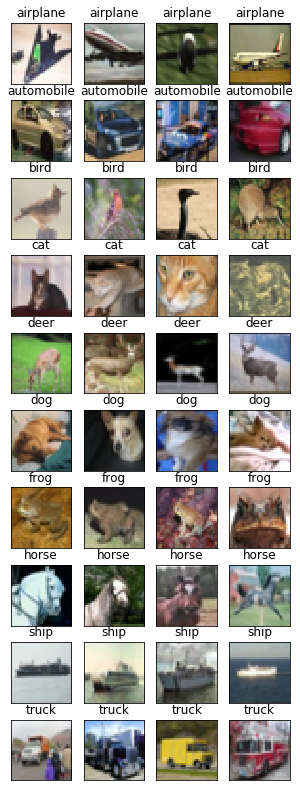

In [14]:
plot_random_images()

## Data Wrangling

For our classification implementation, the fit function in scikit-learn only accepts 2D arrays. Therefore, we need to reshape our data we downloaded from Keras from a 4D array into a 2D array:

In [15]:
nsamples, nx, ny, nz = X_train.shape
X_train_cl = X_train.reshape((nsamples, nx * ny * nz))
nsamples, nx, ny, nz = X_test.shape
X_test_cl = X_test.reshape((nsamples, nx * ny * nz))
y_train_cl = y_train
y_test_cl = y_test

For our neural networks implementation, the input data is standardized and the label data needs to be converted into a category matrix:

In [29]:
import keras

X_train_nn = X_train.astype('float32')
X_test_nn = X_test.astype('float32')
X_train_nn /= 255
X_test_nn /= 255
y_train_nn = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_nn = keras.utils.to_categorical(y_test, NUM_CLASSES)

## Model Building

Let's first predict the class of an image by using conventional classification algorithms:

In [40]:
from sklearn.metrics import classification_report
import time

def fit_model():
    # Train model
    start = time.time()
    model.fit(X_train_cl, y_train_cl)
    duration = time.time() - start

    print("{:25} fit in: {:0.2f} seconds".format(model.__class__.__name__, duration))

    # Test model
    y_pred = model.predict(X_test_cl)

    print(classification_report(y_test_cl, y_pred, target_names=LABEL_NAMES))
    print('Mean accuracy:', model.score(X_test_cl, y_test_cl))

In [41]:
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

models = (Perceptron(),
          RandomForestClassifier(),
          GaussianNB(),
          MultinomialNB(),
         )

for model in models:
    fit_model()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron                fit in: 14.89 seconds
             precision    recall  f1-score   support

   airplane       0.49      0.19      0.27      1000
 automobile       0.95      0.02      0.04      1000
       bird       0.28      0.09      0.14      1000
        cat       0.18      0.46      0.26      1000
       deer       0.22      0.45      0.30      1000
        dog       0.31      0.06      0.10      1000
       frog       0.38      0.34      0.36      1000
      horse       0.52      0.20      0.29      1000
       ship       0.53      0.01      0.02      1000
      truck       0.24      0.77      0.36      1000

avg / total       0.41      0.26      0.21     10000

Mean accuracy: 0.2586


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier    fit in: 26.73 seconds
             precision    recall  f1-score   support

   airplane       0.38      0.54      0.45      1000
 automobile       0.36      0.43      0.39      1000
       bird       0.24      0.31      0.27      1000
        cat       0.25      0.25      0.25      1000
       deer       0.30      0.29      0.30      1000
        dog       0.34      0.29      0.31      1000
       frog       0.41      0.35      0.38      1000
      horse       0.43      0.31      0.36      1000
       ship       0.52      0.46      0.49      1000
      truck       0.44      0.36      0.39      1000

avg / total       0.37      0.36      0.36     10000

Mean accuracy: 0.3588


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB                fit in: 2.82 seconds
             precision    recall  f1-score   support

   airplane       0.27      0.49      0.35      1000
 automobile       0.41      0.17      0.24      1000
       bird       0.19      0.08      0.12      1000
        cat       0.25      0.08      0.12      1000
       deer       0.24      0.42      0.30      1000
        dog       0.31      0.26      0.29      1000
       frog       0.25      0.47      0.33      1000
      horse       0.42      0.13      0.20      1000
       ship       0.39      0.47      0.42      1000
      truck       0.38      0.41      0.39      1000

avg / total       0.31      0.30      0.28     10000

Mean accuracy: 0.2976
MultinomialNB             fit in: 1.14 seconds
             precision    recall  f1-score   support

   airplane       0.43      0.38      0.40      1000
 automobile       0.33      0.18      0.23      1000
       bird       0.31      0.14      0.20      1000
        cat       0.26      0.10

Let's then build a basic neural network model using Keras:

In [31]:
BATCH_SIZE = 32
EPOCHS = 30
PATIENCE = 2

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras import backend as K

if K.backend() == 'tensorflow':
    K.set_image_dim_ordering("th")

model = Sequential()
model.add(Conv2D(IMG_DIM, (3, 3), padding='same', input_shape=X_train_nn.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(IMG_DIM, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(IMG_DIM * 2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(IMG_DIM * 2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(IMG_DIM * 16))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
              )

model.summary()

early_stopping_monitor = EarlyStopping(patience=PATIENCE)

cnn = model.fit(X_train_nn, y_train_nn, validation_data=(X_test_nn, y_test_nn),
               batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping_monitor], shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 15, 15)        18496     
__________

## Model Evaluation

Let's plot the validation accuracy over epochs:

Text(0.5,1,'Validation Accuracy')

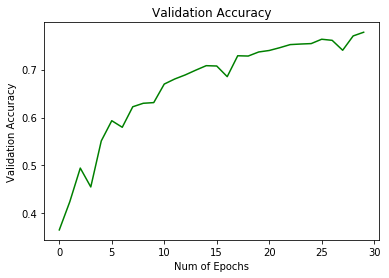

In [35]:
plt.figure(0)
plt.plot(cnn.history['val_acc'],'g')
plt.xlabel("Num of Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy")

## Conclusion

We see that the best performing conventional classification machine learning algorithm, Random Forest, produced a mean test accuracy of 0.3588. Our conventional neural network algorithm produced a test accuracy score of 0.7781. This leads us to believe that using convolutional neural networks is the better choice for image recognition applications. It is noted that accuracy does not tell the whole story: taking a look at the classification score and the f1 scores for each class is important because it tells us how each class performs.

Note however that using convolutional neural networks took significantly longer (about 3 hours) versus using Random Forest (26 seconds).